In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Suppose $X \sim N(\theta, 1)$ and $\theta \in [a,b]$. The maximum likelihood estimator $\hat{\theta}_n$ of $\theta$, based on a random sample of size $n$ from the distribution of $X$ is given by 
$$
\hat{\theta}_n =
\begin{cases}
a, & \text{if } \overline{X}_n < a, \\
\overline{X}_n, & \text{if } \overline{X}_n \in [a,b], \\
b, & \text{if } \overline{X}_n > b .
\end{cases}
$$

We have $\hat{\theta}_n \xrightarrow{P} \theta$.  
Now $\hat{\theta}_n \in [a,b]$, with $a < b$, we have $|\hat{\theta}_n| \le \max\{|a|, |b|\}$.  
Hence, by the Lebesgue dominated convergence theorem,

$$
E(\hat{\theta}_n) \to \theta.
$$

Further, we have,

$$
E(\hat{\theta}_n - \theta)^2 \to 0.
$$

We verify these results using the following code.

In [ ]:
np.random.seed(0)
nvec = np.arange(100,2700,step=300)
th = 2.5
a = 2
b = 4
nsim = 400
ep = 0.05
sample_matrix = np.random.normal(loc=th,scale=1,size=(nsim,max(nvec)))

In [19]:
rn = []
mn = []
vn = []

In [20]:
for n in nvec:
    sample = sample_matrix[:,:n]
    sample_mean = sample.mean(axis=1)
    th_hat = np.zeros(nsim)
    for i in range(nsim):
        if sample_mean[i] < a:
            th_hat[i] = a
        elif sample_mean[i] > b:
            th_hat[i] = b
        else:
            th_hat[i] = sample_mean[i]

    rn.append((np.abs(th_hat - th) < ep).sum() / nsim)
    mn.append(np.mean(th_hat))
    vn.append(np.mean((th_hat - th)**2))

In [21]:
d = pd.DataFrame({'n':nvec,'rn':rn,'mn':mn,'vn':vn})
d = np.round(d,4)
print(d)

      n      rn      mn      vn
0   100  0.3450  2.5031  0.0096
1   400  0.6825  2.5022  0.0023
2   700  0.8250  2.5030  0.0013
3  1000  0.9050  2.5025  0.0009
4  1300  0.9350  2.5018  0.0007
5  1600  0.9475  2.5011  0.0006
6  1900  0.9725  2.5014  0.0005
7  2200  0.9825  2.5019  0.0005
8  2500  0.9900  2.5015  0.0004


Text(0.5, 1.0, 'Convergence in Probability')

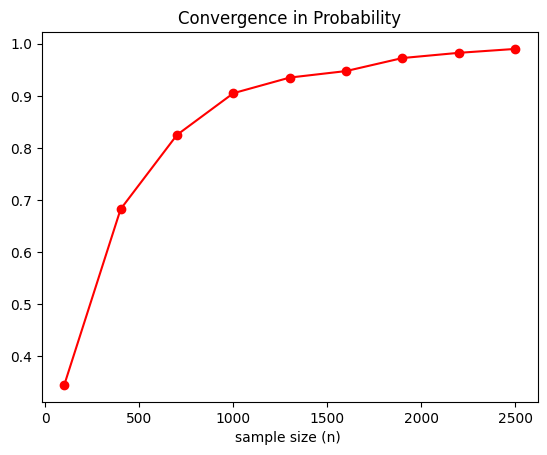

In [26]:
plt.plot(nvec, rn, marker='o',color='red')
plt.xlabel('sample size (n) ')
plt.title('Convergence in Probability')

Text(0.5, 1.0, 'Convergence to Zero')

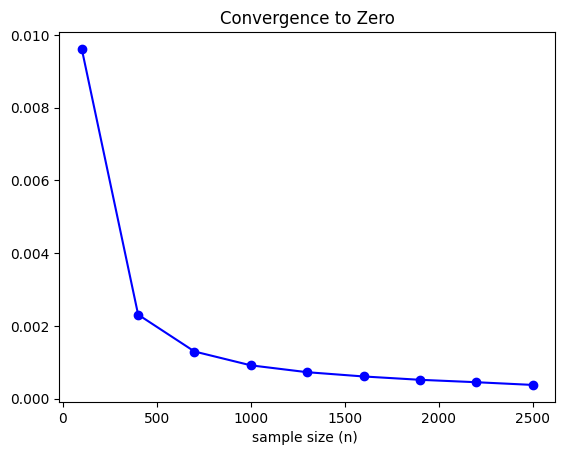

In [25]:
plt.plot(nvec, vn, marker='o',color='blue')
plt.xlabel('sample size (n) ')
plt.title('Convergence to Zero')

From the above figures we note that $r_{f_n} \to 1$, $m_n \to \theta = 2.5$, and $v_n \to 0$ as $n$ increases.  
Thus, we have verified by simulation that if  
$$
\hat{\theta}_n \xrightarrow{P} \theta,
$$
then  
$$
E(\hat{\theta}_n) \to \theta.
$$
